<a href="https://colab.research.google.com/github/Steivann/tugas-data-mining/blob/main/Week_7_Responsi_%5BQuestion%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [51]:
import pandas as pd # Mengimpor library pandas untuk manipulasi data, diberi alias 'pd'
import numpy as np # Mengimpor library numpy untuk komputasi numerik, diberi alias 'np'
import matplotlib.pyplot as plt # Mengimpor modul pyplot dari matplotlib untuk visualisasi, diberi alias 'plt'
import seaborn as sns # Mengimpor library seaborn untuk visualisasi statistik, diberi alias 'sns'
from sklearn.preprocessing import LabelEncoder # Mengimpor LabelEncoder untuk mengubah data kategorikal menjadi numerik
from sklearn.model_selection import train_test_split # Mengimpor train_test_split untuk membagi dataset menjadi data training dan testing
from sklearn.tree import DecisionTreeClassifier # Mengimpor DecisionTreeClassifier untuk membuat model Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Mengimpor metrik untuk evaluasi model klasifikasi
from sklearn import tree # Mengimpor modul tree dari sklearn, mungkin untuk visualisasi decision tree
from sklearn.naive_bayes import GaussianNB # Mengimpor GaussianNB untuk membuat model Gaussian Naive Bayes

## Load Dataset

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/Steivann/Dataset/refs/heads/main/Bank.csv', delimiter=';') # Membaca data dari file CSV di URL dan menyimpannya dalam DataFrame 'df'
df.sample(n=10) # Mengambil 10 sampel acak dari DataFrame 'df' dan menampilkannya

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1788,40,services,married,secondary,no,113,yes,no,unknown,4,jun,126,1,-1,0,unknown,no
411,34,blue-collar,single,secondary,no,186,no,no,cellular,2,feb,342,1,-1,0,unknown,no
1163,35,unemployed,married,secondary,no,977,yes,no,cellular,4,may,52,4,91,1,other,no
23,44,entrepreneur,married,secondary,no,93,no,no,cellular,7,jul,125,2,-1,0,unknown,no
2076,46,technician,married,secondary,no,1427,yes,no,unknown,14,may,32,3,-1,0,unknown,no
4401,38,entrepreneur,divorced,tertiary,no,7929,no,no,cellular,8,jul,182,3,-1,0,unknown,no
4454,37,management,single,tertiary,no,102,yes,no,cellular,21,aug,101,2,-1,0,unknown,no
4412,34,management,single,tertiary,no,2679,yes,no,cellular,7,may,195,1,-1,0,unknown,no
2865,51,housemaid,divorced,secondary,no,9228,no,no,cellular,18,jul,655,4,-1,0,unknown,yes
489,33,management,married,tertiary,no,641,yes,no,cellular,13,aug,347,2,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [53]:
df.info() # Menampilkan informasi ringkas tentang DataFrame 'df', seperti jumlah baris, kolom, tipe data, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [54]:
df.describe() # Menampilkan statistik deskriptif dari kolom-kolom numerik dalam DataFrame 'df'.

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [55]:
print(df['y'].value_counts(dropna=False)) # Mencetak jumlah setiap nilai unik  pada kolom 'y' di DataFrame 'df'.

y
no     4000
yes     521
Name: count, dtype: int64


In [56]:
for column in df.columns:  # Melakukan loop untuk setiap kolom dalam DataFrame 'df'
    buatcount = df[column].value_counts().get('unknown', 0)  # Menghitung jumlah nilai 'unknown' dalam kolom dan menyimpannya dalam variabel 'buatcount'
    print(f"Unknown count in '{column}': {buatcount}")  # Menampilkan jumlah 'unknown' untuk setiap kolom

Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


In [57]:
df['job'] = df['job'].replace('admin.', 'management') # Mengganti nilai 'admin.' dalam kolom 'job' menjadi 'management' di DataFrame 'df'.
df.sample(10) # Menampilkan 10 sampel acak dari DataFrame 'df' setelah penggantian nilai.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3018,57,self-employed,married,secondary,no,35,no,yes,unknown,26,jun,215,3,-1,0,unknown,no
2782,41,technician,married,secondary,no,64,yes,yes,unknown,8,may,210,2,-1,0,unknown,no
3717,59,management,married,tertiary,no,1585,no,no,telephone,28,aug,91,5,-1,0,unknown,no
2975,48,technician,single,tertiary,no,-551,yes,no,cellular,11,may,168,2,-1,0,unknown,no
1970,35,technician,married,secondary,no,-259,yes,no,cellular,29,jan,381,1,247,2,failure,no
1561,54,services,married,unknown,no,386,no,yes,cellular,19,nov,74,1,152,1,success,no
1985,29,student,single,unknown,no,145,no,no,cellular,14,aug,105,1,-1,0,unknown,no
2020,33,blue-collar,married,secondary,no,285,no,yes,unknown,3,jul,267,1,-1,0,unknown,no
3205,77,retired,married,primary,no,680,no,no,telephone,27,nov,341,4,94,3,failure,no
669,56,technician,married,secondary,no,4063,no,yes,telephone,28,jul,31,4,-1,0,unknown,no


In [58]:
label_encoder = LabelEncoder()  # Membuat objek LabelEncoder untuk mengubah data kategorikal menjadi numerik
for column in df.columns:  # Melakukan loop untuk setiap kolom dalam DataFrame 'df'
    if df[column].dtype == 'object':  # Memeriksa apakah tipe data kolom adalah 'object'
        df[column] = label_encoder.fit_transform(df[column].astype(str))  # Mengubah data kategorikal di kolom menjadi numerik
df.sample(n=5)  # Menampilkan 5 baris sampel acak dari DataFrame

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
140,32,3,0,2,0,948,0,0,0,12,1,204,2,-1,0,3,0
1987,35,6,2,1,0,1063,1,1,0,16,0,327,1,-1,0,3,0
3487,39,1,1,3,0,98,1,0,1,15,8,59,3,367,1,1,0
636,41,0,0,0,0,2195,1,0,2,3,6,211,5,-1,0,3,0
4066,36,6,1,1,0,3064,1,0,1,26,1,240,3,107,4,0,0


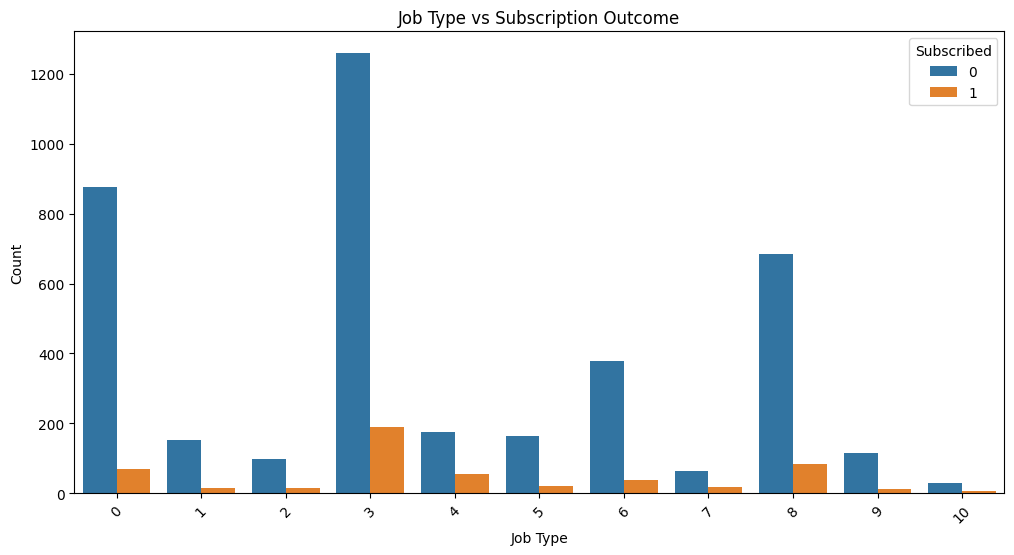

In [59]:
plt.figure(figsize=(12, 6))  # Membuat figure dengan ukuran 12x6 inci
sns.countplot(data=df, x='job', hue='y')  # Membuat countplot dengan Seaborn untuk kolom 'job', diwarnai berdasarkan kolom 'y'
plt.title("Job Type vs Subscription Outcome")  # Menambahkan judul plot
plt.xlabel("Job Type")  # Menambahkan label sumbu x
plt.ylabel("Count")  # Menambahkan label sumbu y
plt.xticks(rotation=45)  # Memutar label sumbu x sebesar 45 derajat agar lebih mudah dibaca
plt.legend(title="Subscribed")  # Menambahkan legend (keterangan warna) dengan judul "Subscribed"
plt.show()  # Menampilkan plot

# Pekerjaan seperti "management" dan "technician" cenderung memiliki lebih banyak pelanggan yang berlangganan, menunjukkan minat yang lebih tinggi.
# Sebaliknya, pekerjaan seperti "blue-collar" memiliki lebih sedikit pelanggan yang berlangganan.

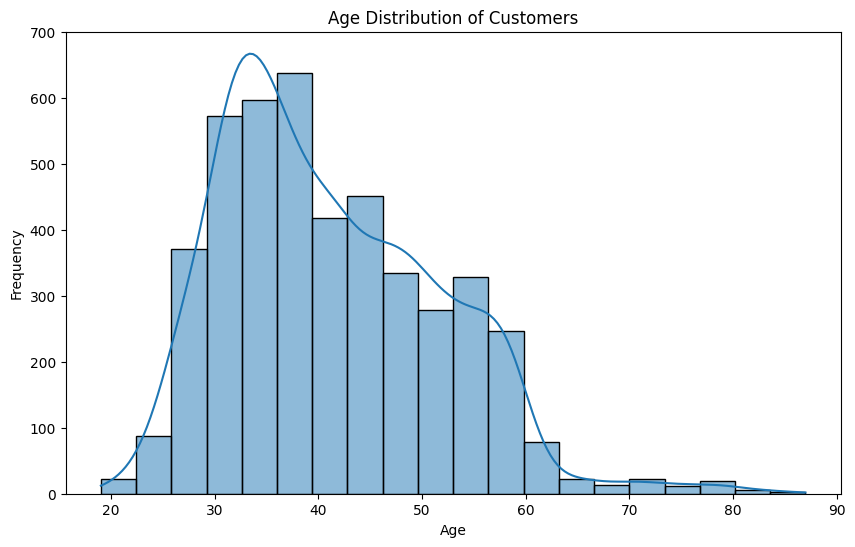

In [60]:
plt.figure(figsize=(10, 6))  # Membuat figure dengan ukuran 10x6 inci
sns.histplot(df['age'], bins=20, kde=True)  # Membuat histogram dengan Seaborn untuk kolom 'age'
plt.title("Age Distribution of Customers")  # Menambahkan judul plot
plt.xlabel("Age")  # Menambahkan label sumbu x
plt.ylabel("Frequency")  # Menambahkan label sumbu y
plt.show()  # Menampilkan plot

#Dari grafik distribusi usia pelanggan ini kelompok usia yang paling dominan di puncak tertentu di rentang usia, seperti di usia 30-40 tahun, ini menunjukkan bahwa mayoritas pelanggan bank berada di kelompok usia tersebut, yang bisa menjadi target utama dalam strategi pemasaran bank.

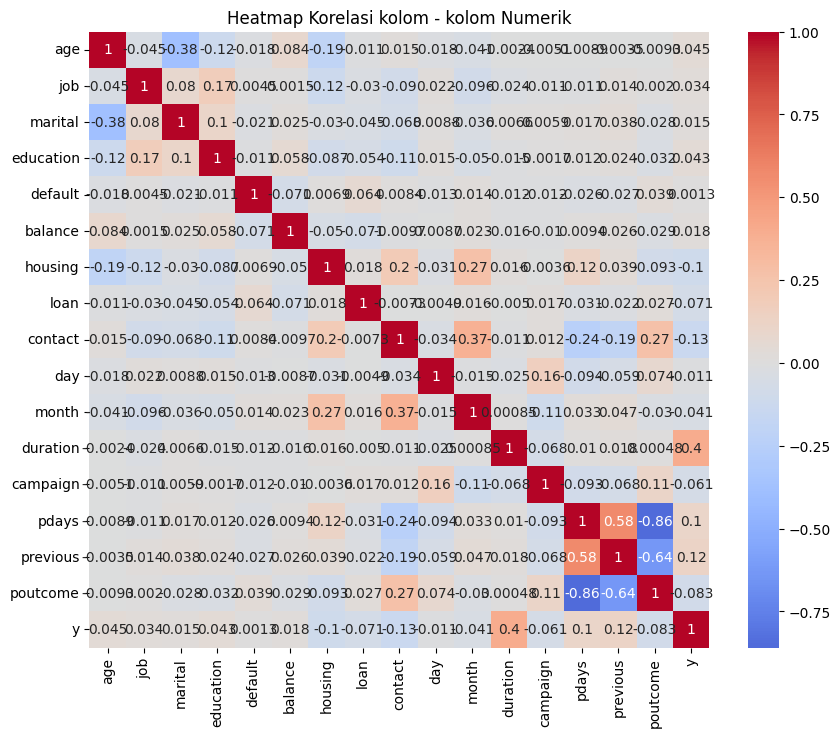

In [61]:
numeric_data = df.select_dtypes(include='number')  # Memilih kolom-kolom numerik dari DataFrame 'df'
correlation_matrix = numeric_data.corr()  # Menghitung matriks korelasi antar kolom numerik
plt.figure(figsize=(10, 8))  # Membuat figure (area plot) dengan ukuran 10x8 inci
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)  # Membuat heatmap dari matriks korelasi
plt.title("Heatmap Korelasi kolom - kolom Numerik")  # Menambahkan judul plot
plt.show()  # Menampilkan plot

#Heatmap korelasi ini menunjukkan kekuatan hubungan antar kolom numerik dalam dataset. Korelasi positif tinggi menunjukkan bahwa dua variabel meningkat atau menurun bersama-sama, sedangkan korelasi negatif tinggi menunjukkan bahwa saat satu variabel meningkat, yang lain cenderung menurun.
#Kolom dengan korelasi yang tinggi (baik positif maupun negatif) bisa menjadi fokus untuk analisis lebih lanjut karena mereka mungkin memiliki keterkaitan yang signifikan dalam konteks bisnis.

## Machine Learning (Split Data)

In [62]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis=1)  # Membuat DataFrame 'X' yang berisi fitur-fitur (variabel independen)
y = df['y']  # Membuat Series 'y' yang berisi target (variabel dependen)

In [63]:
from imblearn.combine import SMOTEENN  # Mengimpor kelas SMOTEENN dari library imblearn
smote_enn = SMOTEENN(random_state=0)  # Membuat objek SMOTEENN dengan random_state=0
X, y = smote_enn.fit_resample(X, y)  # Menerapkan SMOTEENN untuk menyeimbangkan kelas pada data
print("Class distribution after SMOTEEN:")  # Mencetak teks
print(y.value_counts())  # Mencetak jumlah data di setiap kelas setelah SMOTEENN

Class distribution after SMOTEEN:
y
0    2941
1    2266
Name: count, dtype: int64


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Membagi data menjadi data training dan data testing
#Dalam hal ini, 20% data akan digunakan untuk testing, dan 80% sisanya untuk training.

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [65]:
from sklearn.ensemble import RandomForestClassifier  # Mengimpor kelas RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Mengimpor metrik evaluasi
rndm_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Membuat objek RandomForestClassifier
rndm_classifier.fit(X_train, y_train)  # Melatih model RandomForest menggunakan data training

RandomForestClassifier(random_state=42)

In [66]:
y_pred_rndm = rndm_classifier.predict(X_test)  # Membuat prediksi menggunakan model Random Forest pada data testing
accuracy = accuracy_score(y_test, y_pred_rndm)  # Menghitung akurasi model
print(f'Accuracy: {accuracy}')  # Menampilkan nilai akurasi

Accuracy: 0.9942418426103646


In [67]:
y_train_rndm = rndm_classifier.predict(X_train)  # Membuat prediksi pada data training menggunakan model Random Forest
test_accuracy = accuracy_score(y_test, y_pred_rndm)  # Menghitung akurasi pada data testing
training_accuracy = accuracy_score(y_train, y_train_rndm)  # Menghitung akurasi pada data training
print('Testing accuracy: {0:0.4f}'.format(test_accuracy))  # Menampilkan akurasi testing
print('Training accuracy: {0:0.4f}'.format(training_accuracy))  # Menampilkan akurasi training

Testing accuracy: 0.9942
Training accuracy: 1.0000


In [68]:
confmatrix_rndm = confusion_matrix(y_test, y_pred_rndm)  # Membuat confusion matrix
print("\nConfusion Matrix Random Forest:")  # Mencetak judul
print(confmatrix_rndm)  # Menampilkan confusion matrix


Confusion Matrix Random Forest:
[[581   6]
 [  0 455]]


In [69]:
classreport_rndm = classification_report(y_test, y_pred_rndm)  # Membuat classification report
print("Classification Report Random Forest: \n", classreport_rndm)  # Menampilkan classification report

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.99      1.00      0.99       455

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042



**Conclusion **
Model Random Forest menunjukkan performa yang sangat baik dengan akurasi mencapai 99.42% pada data testing. Hal ini didukung oleh akurasi training 100%, menunjukkan kemampuan model dalam mempelajari pola dalam data dengan sangat baik. Confusion matrix menunjukkan bahwa model hanya membuat sedikit kesalahan prediksi, dengan 6 false positive  dan tidak ada false negative. Ini menunjukkan bahwa model sangat akurat dalam mengklasifikasikan kedua kelas. Classification report dengan precision, recall, dan F1-score yang mendekati 1.00 untuk kedua kelas.  Akurasi training yang sempurna dapat mengindikasikan potensi overfitting, tingginya akurasi pada data testing menunjukkan bahwa model masih dapat menggeneralisasi dengan baik ke data baru.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [70]:
from sklearn.ensemble import GradientBoostingClassifier  # Mengimpor kelas GradientBoostingClassifier
from sklearn.model_selection import train_test_split  # Mengimpor fungsi train_test_split (sudah diimpor sebelumnya)
from sklearn.metrics import mean_squared_error, r2_score  # Mengimpor metrik untuk regresi (tidak umum untuk klasifikasi)
grabo_model = GradientBoostingClassifier(random_state=42)  # Membuat objek GradientBoostingClassifier
grabo_model.fit(X_train, y_train)  # Melatih model Gradient Boosting menggunakan data training

GradientBoostingClassifier(random_state=42)

In [71]:
y_pred_grabo = grabo_model.predict(X_test)  # Membuat prediksi menggunakan model Gradient Boosting pada data testing
accuracy = accuracy_score(y_test, y_pred_grabo)  # Menghitung akurasi model
print(f'Accuracy: {accuracy}')  # Menampilkan nilai akurasi

Accuracy: 0.9788867562380038


In [72]:
confmatrix_grabo = confusion_matrix(y_test, y_pred_grabo)  # Membuat confusion matrix
print("\nConfusion Matrix Gradient Boosting:")  # Mencetak judul
print(confmatrix_grabo)  # Menampilkan confusion matrix dari Gradient Boosting


Confusion Matrix Gradient Boosting:
[[570  17]
 [  5 450]]


In [73]:
classreport_grabo = classification_report(y_test, y_pred_grabo)  # Membuat classification report untuk Gradient Boosting
print("Classification Report Gradient Boosting: \n", classreport_grabo)  # Menampilkan classification report Gradient Boosting

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       587
           1       0.96      0.99      0.98       455

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042



**Conclusion ** Model Gradient Boosting menunjukkan performa yang sangat baik, dengan akurasi mencapai 97.89% pada data testing. Confusion matrix menunjukkan bahwa model membuat sedikit kesalahan prediksi, dengan 17 false positive untuk dan 5 false negative. Ini mengindikasikan bahwa model memiliki kemampuan yang baik dalam mengklasifikasikan kedua kelas. Classification report menunjukkan precision, recall, dan F1-score yang tinggi untuk kedua kelas, dengan nilai-nilai di atas 0.96. Hal ini menegaskan performa model yang baik dalam meminimalkan false positive dan false negative. Secara keseluruhan, model Gradient Boosting ini juga merupakan model yang efektif untuk memprediksi, meskipun akurasinya sedikit lebih rendah dibandingkan dengan model Random Forest."